<a href="https://colab.research.google.com/github/Francisss3/AAI614_Francis-/blob/main/Notebook5_4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 5.4: Experiment with KNN*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%205/Notebook5.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Example I: Classifying Social Networks Ads

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

dataset = pd.read_csv('https://raw.githubusercontent.com/harmanani/AAI614/main/Week%205/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set

Use the KNN model for training by specifying the input and output variables of the training set as follows.  Note that *p =2* refers to **euclidean distance**.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [6]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [8]:
# Changing KNN hyperparameters
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [9]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')


Cross-Validation Accuracy: 0.76 ± 0.09


# Example II: Classifying Digits

In [12]:
from sklearn import metrics

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [14]:
digits = load_digits()
# Train the model using the training sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
#Predict Output
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(x_test))
score = model.score(x_test, y_test)

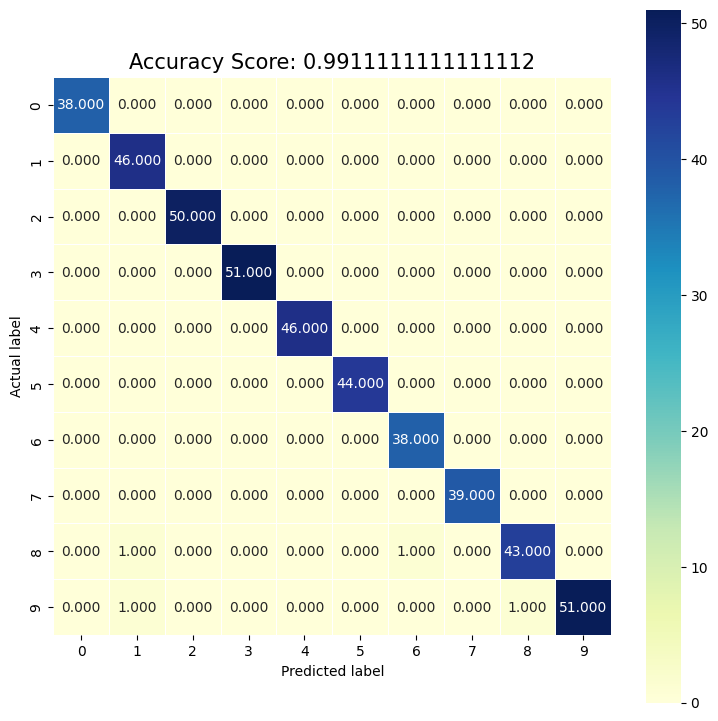

In [17]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'YlGnBu')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [18]:
from sklearn.svm import SVC


In [19]:
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [20]:
y_pred_svm = svm_model.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)


SVM Accuracy: 0.98
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  1  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  1  0  0  0  2]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  1  0 42  0  0  0  1]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  1  0  0  2  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  0 53]]


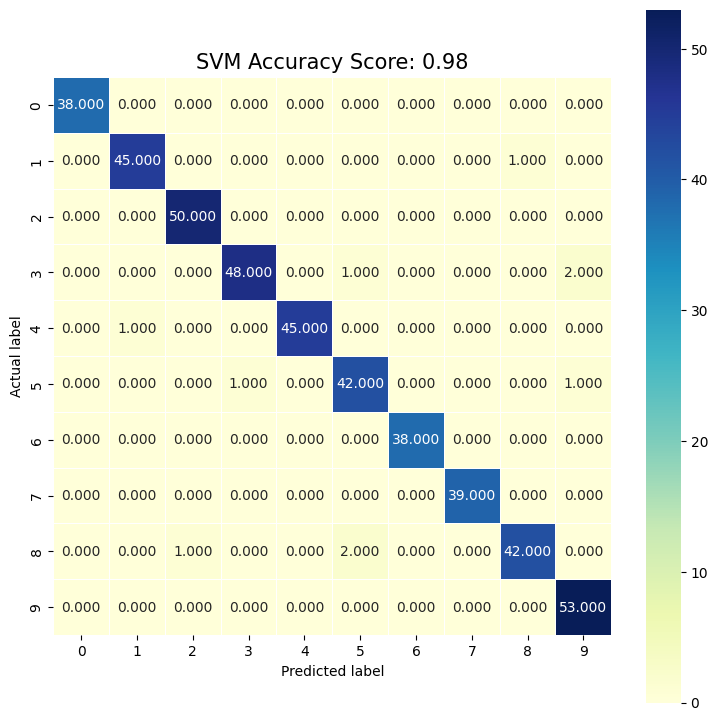

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
sns.heatmap(cm_svm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'SVM Accuracy Score: {accuracy_svm:.2f}', size=15)
plt.show()
